## 1.Import Libraries

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Loading and Exploring the Iris Dataset

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]

In [ ]:
# Display basic information about the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## 3.Visualizing the Iris Dataset Using Pairplot

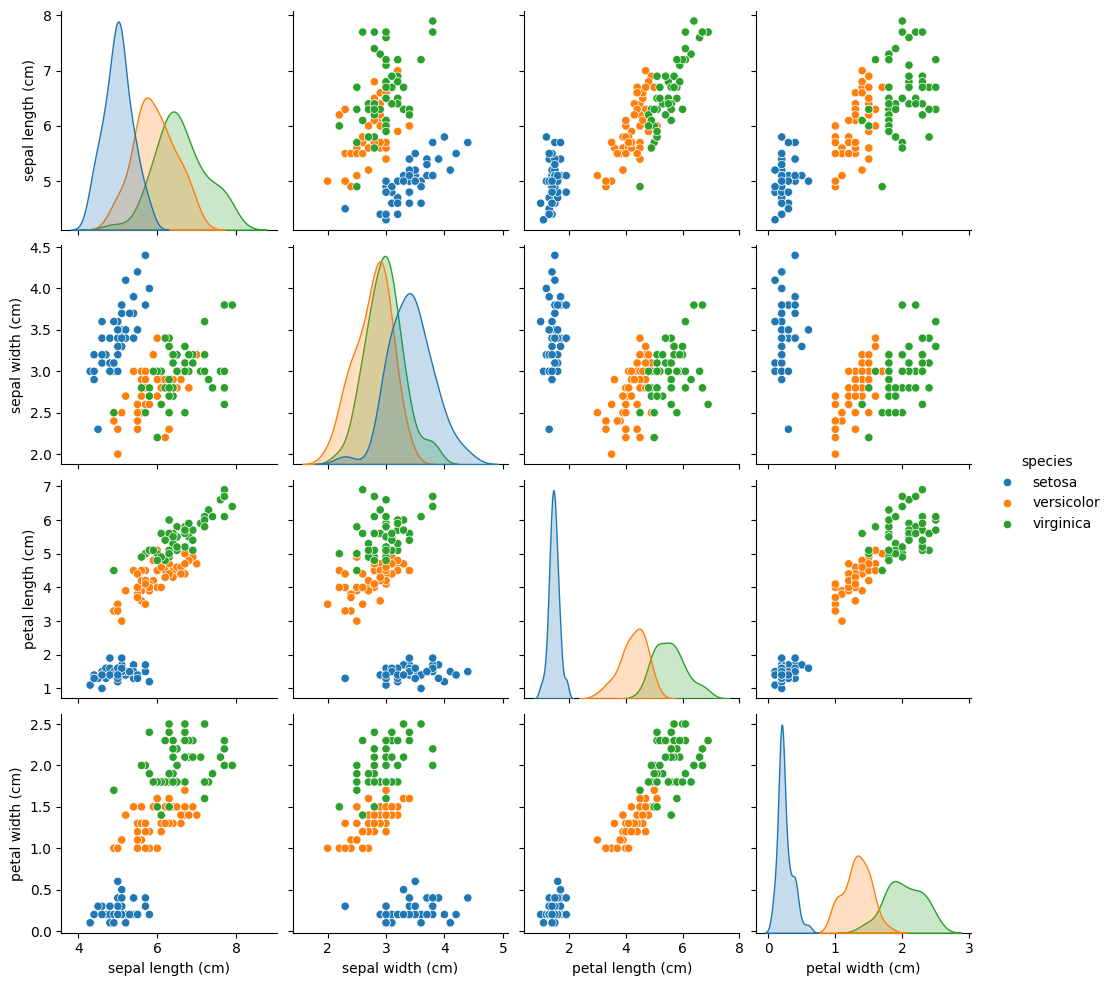

In [ ]:
# Visualize the dataset using pairplot
sns.pairplot(iris_df, hue='species')
plt.show()

## 4.Splitting the Dataset into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 105
Test set size: 45


## 5.Handling Missing Values and Duplicates

In [ ]:
# Check for missing values in each column
missing_values = iris_df.isna().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = iris_df[iris_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
print(duplicate_rows)  # Display the duplicate rows

Number of duplicate rows: 1
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

       species  
142  virginica  


In [ ]:
# Check for null values in each column
null_values = iris_df.isnull().sum()
print(null_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## 6.Scaling Features Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 7.Training and Evaluating Random Forest and AdaBoost Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train both models
rf_clf.fit(X_train_scaled, y_train)
ada_boost_clf.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_clf.predict(X_test_scaled)
ada_boost_predictions = ada_boost_clf.predict(X_test_scaled)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_predictions)

print("Random Forest Classifier accuracy:", rf_accuracy)
print("AdaBoost Classifier accuracy:", ada_boost_accuracy)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nAdaBoost Classification Report:")
print(classification_report(y_test, ada_boost_predictions))


Random Forest Classifier accuracy: 0.8888888888888888
AdaBoost Classifier accuracy: 0.9333333333333333

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## 8.PCA for Dimensionality Reduction and Model Training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Apply PCA to reduce the dataset to 2D for visualization purposes
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Initialize the models
rf_clf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_clf_2d = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train both models on the 2D data
rf_clf_2d.fit(X_train_2d, y_train)
ada_boost_clf_2d.fit(X_train_2d, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

## 9.Visualizing Decision Boundaries for Random Forest and AdaBoost

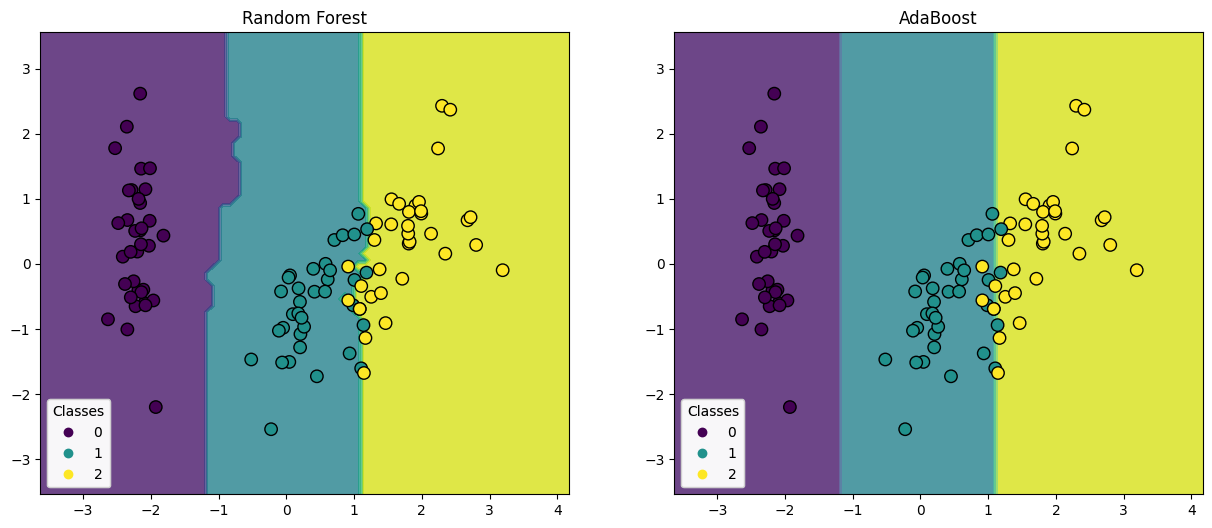

In [ ]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Function to plot decision boundaries (same as before)
def plot_decision_boundary(model, X, y, ax, title):
    # Predict over the grid to get the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80)

    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
    ax.add_artist(legend1)
    ax.set_title(title)

# Plot decision boundaries for both classifiers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Use the 2D transformed data for visualization
plot_decision_boundary(rf_clf_2d, X_train_2d, y_train, axes[0], "Random Forest")
plot_decision_boundary(ada_boost_clf_2d, X_train_2d, y_train, axes[1], "AdaBoost")
plt.show()


## 10.Confusion Matrix Visualization

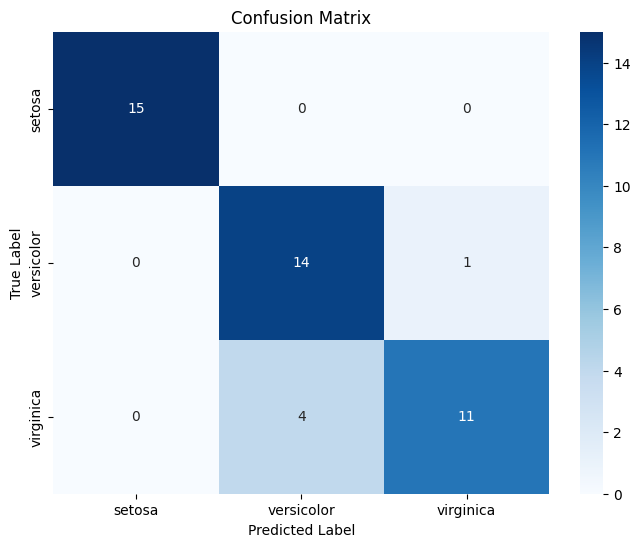

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions in 'rf_predictions' or 'ada_boost_predictions'
# and true labels in 'y_test'

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)  # or ada_boost_predictions

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 11.Calibrating Classifiers and Plotting Predicted Probabilities

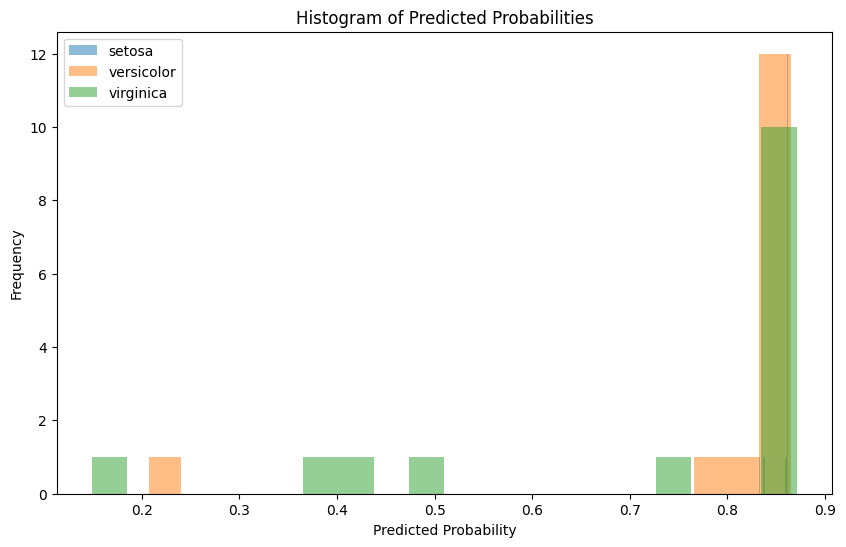

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Assuming you are using rf_clf or ada_boost_clf
# Create a calibrated classifier for probability predictions
calibrated_clf = CalibratedClassifierCV(rf_clf, method='sigmoid', cv=5)  # or ada_boost_clf
calibrated_clf.fit(X_train_scaled, y_train)

# Get predicted probabilities
probas = calibrated_clf.predict_proba(X_test_scaled)

# Plot histogram for each class
plt.figure(figsize=(10, 6))
for i in range(len(iris.target_names)):
    plt.hist(probas[y_test == i, i], bins=20, alpha=0.5, label=iris.target_names[i])

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.legend()
plt.show()